In [1]:
from multitask_classifier import *
MULTITASK = "./stats/multitask_metrics.json"

c:\ProgramData\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class DotDict(dict):
    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError:
            raise AttributeError(f"'DotDict' object has no attribute '{key}'")

    def __setattr__(self, key, value):
        self[key] = value

In [3]:
TQDM_DISABLE = False

args_dict = {
    "sst_train": "data/ids-sst-train.csv",
    "sst_dev": "data/ids-sst-dev.csv",
    "sst_test": "data/ids-sst-test-student.csv",

    "para_train": "data/quora-train.csv",
    "para_dev": "data/quora-dev.csv",
    "para_test": "data/quora-test-student.csv",

    "sts_train": "data/sts-train.csv",
    "sts_dev": "data/sts-dev.csv",
    "sts_test": "data/sts-test-student.csv",

    "seed": 11711,
    "epochs": 10,
    "option": "finetune",
    "use_gpu": False,  # Default is False, set to True if required

    "sst_dev_out": "predictions/sst-dev-output.csv",
    "sst_test_out": "predictions/sst-test-output.csv",

    "para_dev_out": "predictions/para-dev-output.csv",
    "para_test_out": "predictions/para-test-output.csv",

    "sts_dev_out": "predictions/sts-dev-output.csv",
    "sts_test_out": "predictions/sts-test-output.csv",

    # hyperparameters
    "batch_size": 32,  # 64 for sst, 8 for cfimdb can fit a 12GB GPU
    "hidden_dropout_prob": 0.3,
    "lr": 1e-5  # 1e-3 for pretrain, 1e-5 for fine-tuning
}

args = DotDict(args_dict)

In [4]:
# args = get_args()
args.filepath = f'{args.option}-{args.epochs}-{args.lr}-multitask.pt' # save path
seed_everything(args.seed)  # fix the seed for reproducibility

save_metrics = {
    "batch_size": args.batch_size,
    "lr": args.lr,
    "hidden_dropout_prob": args.hidden_dropout_prob,
    "option": args.option,
    "epoch": [],
    "train_loss": [],
    "train_sentiment_acc": [],
    "train_paraphrase_acc": [],
    "train_sts_corr": [],
    "train_avg_normalized_score": [],
    "test_sentiment_accuracy": [], 
    "test_paraphrase_accuracy": [],
    "test_sts_corr": []
}

train_multitask(args, save_metrics)
test_model(args, save_metrics)

# Save save_metrics to a JSON file
with open(MULTITASK, 'w') as f:
    json.dump(save_metrics, f, indent=4)

print(f'Metrics saved to {MULTITASK}')

========================Loading data========================
Loaded 8544 train examples from data/ids-sst-train.csv
Loaded 141498 train examples from data/quora-train.csv
Loaded 6040 train examples from data/sts-train.csv
Loaded 1101 train examples from data/ids-sst-dev.csv
Loaded 20212 train examples from data/quora-dev.csv
Loaded 863 train examples from data/sts-dev.csv
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
https://hf-mirror.com/bert-base-uncased/resolve/main/vocab.txt
========================Data loaded========================
========================Model Created========================


C:\Users\LAM NGUYEN\AppData\Roaming\Python\Python310\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


========================Training========================


train-0:   0%|          | 0/267 [00:00<?, ?it/s]C:\Users\LAM NGUYEN\AppData\Roaming\Python\Python310\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
train-0:  67%|██████▋   | 179/267 [45:11<22:12, 15.15s/it] 


KeyboardInterrupt: 

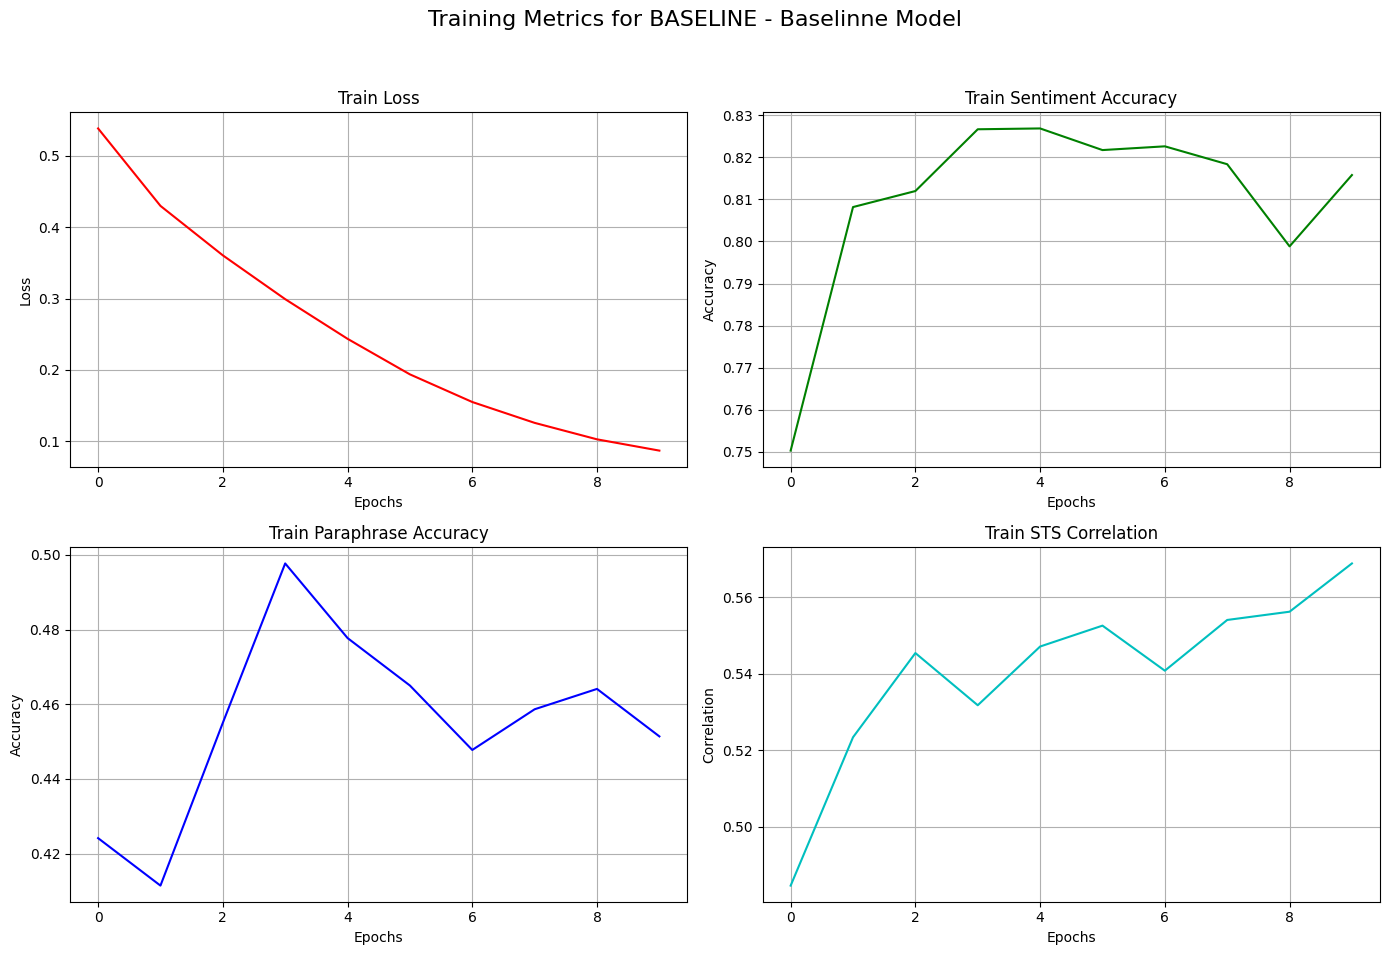

In [ ]:
from utils import *

visualize_multitask(MULTITASK)